In [1]:
!echo $TESSDATA_PREFIX

/home/shrinivas/Nitin.Desai/ocr/tesseract-4.1.1/tessdata


In [1]:
import pytesseract
from pytesseract import Output
import cv2

In [31]:
#img = cv2.imread("/home/shrinivas/Nitin.Desai/ocr/app/demo_images/demo5.jpg")
img = cv2.imread("/home/shrinivas/Nitin.Desai/ocr/app/static/uploads/iciYiWytYp.jpg")
d = pytesseract.image_to_data(img, output_type=Output.DICT, lang='eng', config="--psm 4 -c tessedit_create_hocr=1")

In [69]:
n_boxes = len(d['level'])
overlay = img.copy()

In [53]:
import pandas as pd
d_df= pd.DataFrame(d)
d_df.loc[d_df['text']!="",['text','left','top','width','height']]

,text,left,top,width,height
4,,152,140,104,46
6,,54,186,304,121
8,,0,307,746,189
9,,606,427,140,57
13,How,445,202,67,22
14,to,521,202,31,22
15,Identify,563,201,117,30
17,Right,445,237,80,30
18,Sector,534,237,100,23
19,and,644,237,56,23


In [34]:
d_df[d_df['text']=="to"]

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
14,2,96,22,521,5,1,1,1,to,202,31,2
22,2,93,22,539,5,3,1,1,to,274,31,2


In [70]:
for i in range(n_boxes):
    text = d['text'][i]

    if fuzz.partial_ratio(text,'to')>99:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        print(x, y, w, h)
        (x1, y1, w1, h1) = (d['left'][i + 1], d['top'][i + 1], d['width'][i + 1], d['height'][i + 1])
        print(x1, y1, w1, h1)
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 0, 0), -1)
        (x2, y2, w2, h2) = (d['left'][i + 2], d['top'][i + 2], d['width'][i + 2], d['height'][i + 2])
        print(x2, y2, w2, h2)
        # cv2.rectangle(img, (x, y), (x1 + w1, y1 + h1), (0, 255, 0), 2)
#         cv2.rectangle(overlay, (x, y), (x1 + w1, y1 + h1), (255, 0, 0), -1)
        # cv2.rectangle(img, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)
#         cv2.rectangle(overlay, (x2, y2), (x2 + w2, y2 + h2), (0, 0, 255), -1)
        print(text)
        break

521 202 31 22
563 201 117 30
445 237 255 30
to


In [71]:


alpha = 0.4  # Transparency factor.
# Following line overlays transparent rectangle over the image
img_new = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)

# r = 1000.0 / img_new.shape[1]  # resizing image without loosing aspect ratio
# dim = (1000, int(img_new.shape[0] * r))
# # perform the actual resizing of the image and show it
# resized = cv2.resize(img_new, dim, interpolation=cv2.INTER_AREA)
#cv2.imshow('img', resized)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


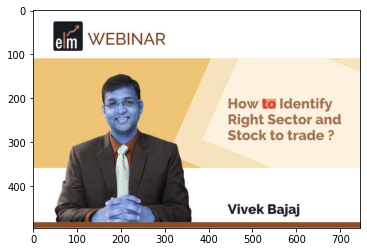

In [72]:
import matplotlib.pyplot as plt

#img = cv2.imread('img.jpg')
img2 = img_new[:,:,::-1]
plt.imshow(img_new)

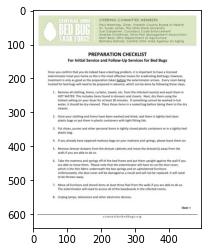

In [9]:
import matplotlib.pyplot as plt
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [7]:
!pip install Pillow

In [11]:
!python app.py

 * Serving Flask app 'app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on all addresses.
 * Running on http://10.2.11.2:5000/ (Press CTRL+C to quit)
[2022-06-30 04:45:56,230] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "app.py", line 23, in ho

In [13]:
TEMPLATES_AUTO_RELOAD = True
from flask import Flask, render_template, request

In [22]:
from fuzzywuzzy import fuzz

In [12]:
def get_extension(filename):
    return '.' in filename and "."+filename.rsplit('.', 1)[1].lower() 

get_extension("a.jpg")

'.jpg'

In [21]:
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.0 MB/s             
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for python-Levenshtein, since package 'wheel' is not installed.
    Running setup.py install for python-Levenshtein ... done


In [ ]:
fuzz.partial_ratio